0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


/Users/lfawaz/miniconda2/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py:27: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Confusion Matrix:  [[931  51]
 [ 77 932]]
Accuracy:  0.935710698142
Mis Classified Images
Image:  0
0    0.322032
1    0.677968
Name: 40, dtype: float64
Image:  1
0    0.30494
1    0.69506
Name: 46, dtype: float64
Image:  2
0    0.096009
1    0.903991
Name: 64, dtype: float64
Ambigous Images
Image:  0
0       0.498744
1       0.501256
diff    0.002511
Name: 1990, dtype: float64
Image:  1
0       0.497926
1       0.502074
diff    0.004148
Name: 210, dtype: float64
Image:  2
0       0.503314
1       0.496686
diff    0.006627
Name: 586, dtype: float64


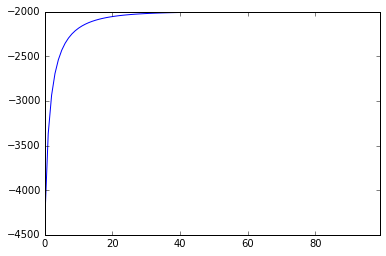

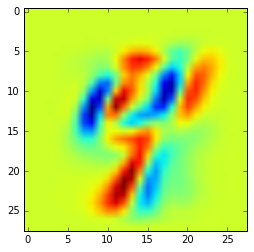

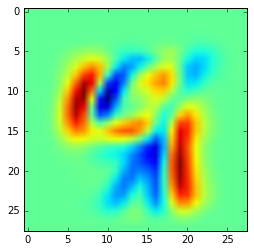

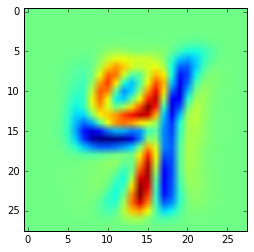

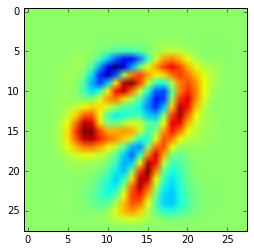

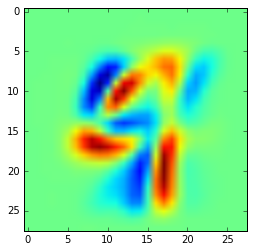

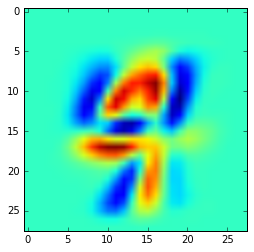

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from ExpectationMaximization import Probit
%matplotlib inline


def calculateAccuracy(matrix):
    matrix = matrix.astype(float)
    return np.trace(matrix)/np.sum(matrix)
    
def showImage(Q,vector):
    image = Q.dot(vector).reshape(28,28)
    plt.figure()
    plt.imshow(image)


def missClassifyIndex(n,Ytest,Ypred): 
    Ytest_pred = pd.concat([Ytest,Ypred],axis=1)
    Ytest_pred.columns = ['Ytest','Ypred']
    Ytest_pred['missed'] = abs(Ytest_pred['Ytest'] - Ytest_pred['Ypred'])
    return Ytest_pred[Ytest_pred["missed"] == 1].head(n=n).index.tolist()

def ambiguousPredictions(n,Yproba):
    Yproba["diff"] = abs(Yproba[0] - Yproba[1])
    return Yproba.sort(["diff"],ascending=1).head(n=n).index.tolist()
    
def getImages(indexes,Xtest,Yproba):
    images = []
    proba = []
    for i in range(len(indexes)):
        idx = indexes[i]
        images.append(Xtest.iloc[idx])
        proba.append(Yproba.iloc[idx])
    return images, proba

def main():
    #Load Data
    Xtrain = pd.read_csv("./hw2_data_csv/Xtrain.csv",header=None)
    Xtest = pd.read_csv("./hw2_data_csv/Xtest.csv",header=None)
    Ytrain = pd.read_csv("./hw2_data_csv/Ytrain.csv",header=None)
    Ytest = pd.read_csv("./hw2_data_csv/Ytest.csv",header=None)
    Q =  pd.read_csv("./hw2_data_csv/Q.csv",header=None)
    
    #Load Model
    model = Probit(Xtrain,Ytrain,n_iter=100)
    
    #train Model
    model.fit()
    
    #predictions
    Ypred = pd.DataFrame(model.predict(Xtest))
    
    #probabilities
    Yproba = pd.DataFrame(model.predict_proba(Xtest))
    
    #likelihood
    likelihoods = model.logLikelihoods
    
    #confusion matrix
    conf_matrix = confusion_matrix(Ytest,Ypred)
    
    #accuracy 
    accuracy = calculateAccuracy(conf_matrix)
    
    #miss classified images
    mis_images, mis_proba = getImages(missClassifyIndex(3,Ytest,Ypred),Xtest,Yproba)
    
    #ambigous images
    amb_images, amb_proba = getImages(ambiguousPredictions(3,Yproba),Xtest,Yproba)
    
    #plot likelihoods
    pd.Series(likelihoods).plot(kind='line')

    print "Confusion Matrix: ", conf_matrix
    print "Accuracy: ", accuracy
    print "Mis Classified Images"
    for i in range(len(mis_images)):
        print "Image: " , i
        print mis_proba[i]
        showImage(Q,mis_images[i])
        
    print "Ambigous Images"
    for j in range(len(amb_images)):
        print "Image: ", j
        print amb_proba[j]
        showImage(Q,amb_images[j])
if __name__ == "__main__":
    main()